In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sea

import warnings
warnings.filterwarnings('ignore')

In [52]:
data = pd.read_csv('/Users/ankusmanish/Desktop/Training/Datasets/Week8/Churn_Modelling.csv')

In [53]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [55]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [56]:
data['Tenure'].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

In [57]:
len(data[data['Balance'] == 0])

3617

In [58]:
data['Balance'] = data['Balance'].replace({0:data['Balance'].mean()})

In [59]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,76485.889288,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860000,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800000,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,76485.889288,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820000,1,1,1,79084.10,0


In [60]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [61]:
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)

In [62]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,76485.889288,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.860000,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.800000,3,1,0,113931.57,1
3,699,France,Female,39,1,76485.889288,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.820000,1,1,1,79084.10,0


In [63]:
data = pd.get_dummies(data)

In [64]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,76485.889288,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.860000,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.800000,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,76485.889288,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.820000,1,1,1,79084.10,0,0,0,1,1,0


In [65]:
data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [66]:
data = pd.DataFrame(data, columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male', 'Exited'])

In [67]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Exited
0,619,42,2,76485.889288,1,1,1,101348.88,1,0,0,1,0,1
1,608,41,1,83807.860000,1,0,1,112542.58,0,0,1,1,0,0
2,502,42,8,159660.800000,3,1,0,113931.57,1,0,0,1,0,1
3,699,39,1,76485.889288,2,0,0,93826.63,1,0,0,1,0,0
4,850,43,2,125510.820000,1,1,1,79084.10,0,0,1,1,0,0


In [68]:
X_train, y_train, X_test, y_test = (data.iloc[:7500,:13], data.iloc[:7500,13:], data.iloc[7500:,:13], data.iloc[7500:,13:])



In [69]:
X_train = X_train.T.values
y_train = y_train.T.values
X_test = X_test.T.values
y_test = y_test.T.values

# Implementing multi layered Neural Networks

In [70]:
def sigmoid(Z):
    A = 1 / (1 + (np.exp(-Z)))
    
    return A

In [71]:
def layer_sizes(X, Y):
    n_x1 = X.shape[0] # size of input layer
    n_h1 = 4 # size of nodes in 1st layer
    n_x2 = 4 #size of the input from 1st hidden layer 
    n_h2 = 3 # number of nodes in 2nd layer
    n_y = Y.shape[0] # size of output layer

    return (n_x1, n_x2, n_h1, n_h2, n_y)

In [72]:
def initialize_parameters(n_x1, n_x2, n_h1, n_h2, n_y):
    
    np.random.seed(2)
    
    W1 = np.random.randn(n_h1, n_x1) * 0.01
    b1 = np.zeros((n_h1, 1))
    W2 = np.random.randn(n_h2, n_x2) * 0.01
    b2 = np.zeros((n_h2, 1))
    W3 = np.random.randn(n_y, n_h2) * 0.01
    b3 = np.zeros((n_y, 1))

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters

In [73]:
def forward_propagation(X, parameters):

    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']    
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    #forward propogation
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = np.tanh(Z2)
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2,
             "Z3": Z3,
             "A3": A3}
    
    return A3, cache

In [74]:
def compute_cost(A3, Y):
    
    m = Y.shape[1] 

    cost = -(np.sum(np.multiply(np.log(A3), Y) + np.multiply((1 - Y), np.log(1 - A3)))) / m
    
    return cost

In [75]:
def backward_propagation(parameters, cache, X, Y):

    m = X.shape[1]
    
    W1 = parameters['W1']
    W2 = parameters['W2']
    W3 = parameters['W3']
        
    A1 = cache['A1']
    A2 = cache['A2']
    A3 = cache['A3']
    
    # backward propagation: calculate dW1, db1, dW2, db2, dW3, db3 
    dZ3 = A3 - Y
    dW3 = (1 / m) * np.dot(dZ3, A2.T)
    db3 = (1 / m) * np.sum(dZ3, axis = 1, keepdims = True)
    dZ2= A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims = True)
    dZ1 = A1 - Y
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims = True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2,
             "dW3": dW3,
             "db3": db3}
    
    return grads

In [76]:
def update_parameters(parameters, grads, learning_rate=0.001):

    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    dW3 = grads['dW3']
    db3 = grads['db3']
    
    # update parameters
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W3 = W3 - learning_rate * dW3
    b3 = b3 - learning_rate * db3
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters

In [77]:
def nn_model(X, Y, num_iterations):

    cost_lis = []
    np.random.seed(3)
    n_x1 = layer_sizes(X, Y)[0]
    n_x2 = layer_sizes(X, Y)[1]
    n_h1 = layer_sizes(X, Y)[2]
    n_h2 = layer_sizes(X, Y)[3]
    n_y = layer_sizes(X, Y)[-1]
    
    parameters = initialize_parameters(n_x1, n_x2, n_h1, n_h2, n_y)
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    #gradient descent

    for i in range(num_iterations):
         
        A3, cache = forward_propagation(X, parameters)
        
        cost = compute_cost(A3, Y)
        cost_lis.append(cost)
 
        grads = backward_propagation(parameters, cache, X, Y)
 
        parameters = update_parameters(parameters, grads)
        

    return parameters, cost_lis   

In [78]:
parameters, cost_lis = nn_model(X_train, y_train, num_iterations=15000)

In [79]:
parameters['W1'].shape

(4, 13)

In [80]:
cost_lis

[0.6932450398982071,
 0.6929526033801137,
 0.6929491665619265,
 0.6929120094286224,
 0.6927225211666451,
 0.6926475599901181,
 0.6927067414788978,
 0.6924479561552911,
 0.6925304103009745,
 0.6922765371642708,
 0.6921910706831855,
 0.6922671392820896,
 0.692016858559513,
 0.6920915307190024,
 0.6918332891357398,
 0.6917554635481711,
 0.6918289625451118,
 0.6915855922512134,
 0.6916531167638086,
 0.6913457349659676,
 0.6913665338536791,
 0.6913912198467207,
 0.6911482749729755,
 0.6912165698720268,
 0.6909408488427665,
 0.6908877511749132,
 0.6909559292169234,
 0.6907465315457003,
 0.6906974831359765,
 0.6905087731713949,
 0.6904908712653144,
 0.6905214658865896,
 0.6903167134159093,
 0.6902763909269439,
 0.6900699441601137,
 0.6900257122931941,
 0.6900863535630151,
 0.689877515451229,
 0.68988518719447,
 0.6896324088999999,
 0.6895979969837552,
 0.689651517758725,
 0.68944816261753,
 0.689456871751025,
 0.6891961758825872,
 0.6891713022924137,
 0.6892179236669489,
 0.6889864880680903,


In [81]:
parameters['W3']

array([[-0.21259245, -0.1914419 , -0.19882641]])

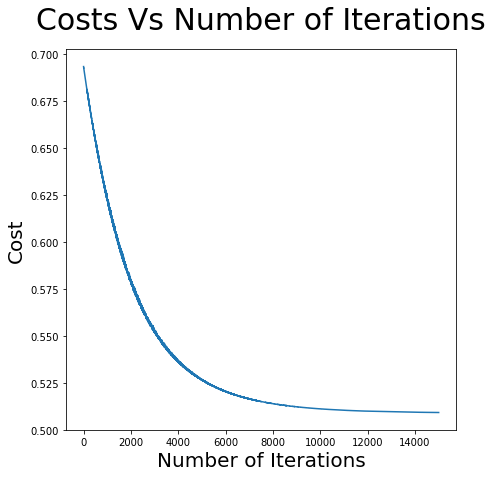

In [82]:
num_iterations = range(15000)

plt.figure(figsize = (7,7))
plt.xlabel('Number of Iterations', fontsize = 20)
plt.ylabel('Cost', fontsize = 20)
plt.title('Costs Vs Number of Iterations', fontsize = 30, pad = 20)
plt.plot(num_iterations, cost_lis)
plt.show()

In [83]:
def predict(parameters, X):

    A3, cache = forward_propagation(X, parameters)
    predictions = np.round(A3)
    
    return predictions

In [84]:
y_pred = predict(parameters, X_test)

In [85]:
def accuracy(y_test, y_pred):
    true = 0
    false = 0
    for i in range(len(y_test[0])):
        if y_test[0][i] == y_pred[0][i]:
            true += 1
        else:
            false += 1

    accuracy = true * 100 / (true + false)       
    return accuracy

In [86]:
accuracy(y_test, y_pred)

80.36